# Examples

The following examples show how to use the loader APIs:

## 1. Parsing

This sample shows how to read a CWL document from a remote public URL:

In [ ]:
import cwl_loader

cwl_document = cwl_loader.load_cwl_from_location('https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl')

## 1.1 Check the parsed document

In [ ]:
import sys

cwl_loader.dump_cwl(cwl_document, sys.stderr)

## 2. Components diagram



This sample shows how to write a CWL document to a stream (string, file, ...):

## 2.1 PlantUML `components` diagram

@startuml

skinparam linetype ortho


node "CommandLineTool 'otsu'" {
    component "otsu" as otsu {
    
        portin "raster" as otsu_raster
    
    
        portout "binary_mask_item" as otsu_binary_mask_item
    
    }


}

node "Workflow 'water-bodies'" {
    component "water-bodies" as water_bodies {
    
        portin "stac_api_endpoint" as water_bodies_stac_api_endpoint
    
        portin "search_request" as water_bodies_search_request
    
        portin "bands" as water_bodies_bands
    
    
        portout "zarr_stac_catalog" as water_bodies_zarr_stac_catalog
    
        portout "stac_catalog" as water_bodies_stac_catalog
    
    }


    component "discovery" as water_bodies_discovery {
    
        portin "api_endpoint" as water_bodies_discovery_api_endpoint
        water_bodies_stac_api_endpoint .down.> water_bodies_discovery_api_endpoint
    
        portin "search_request" as water_bodies_discovery_search_request
        water_bodies_search_request .down.> water_

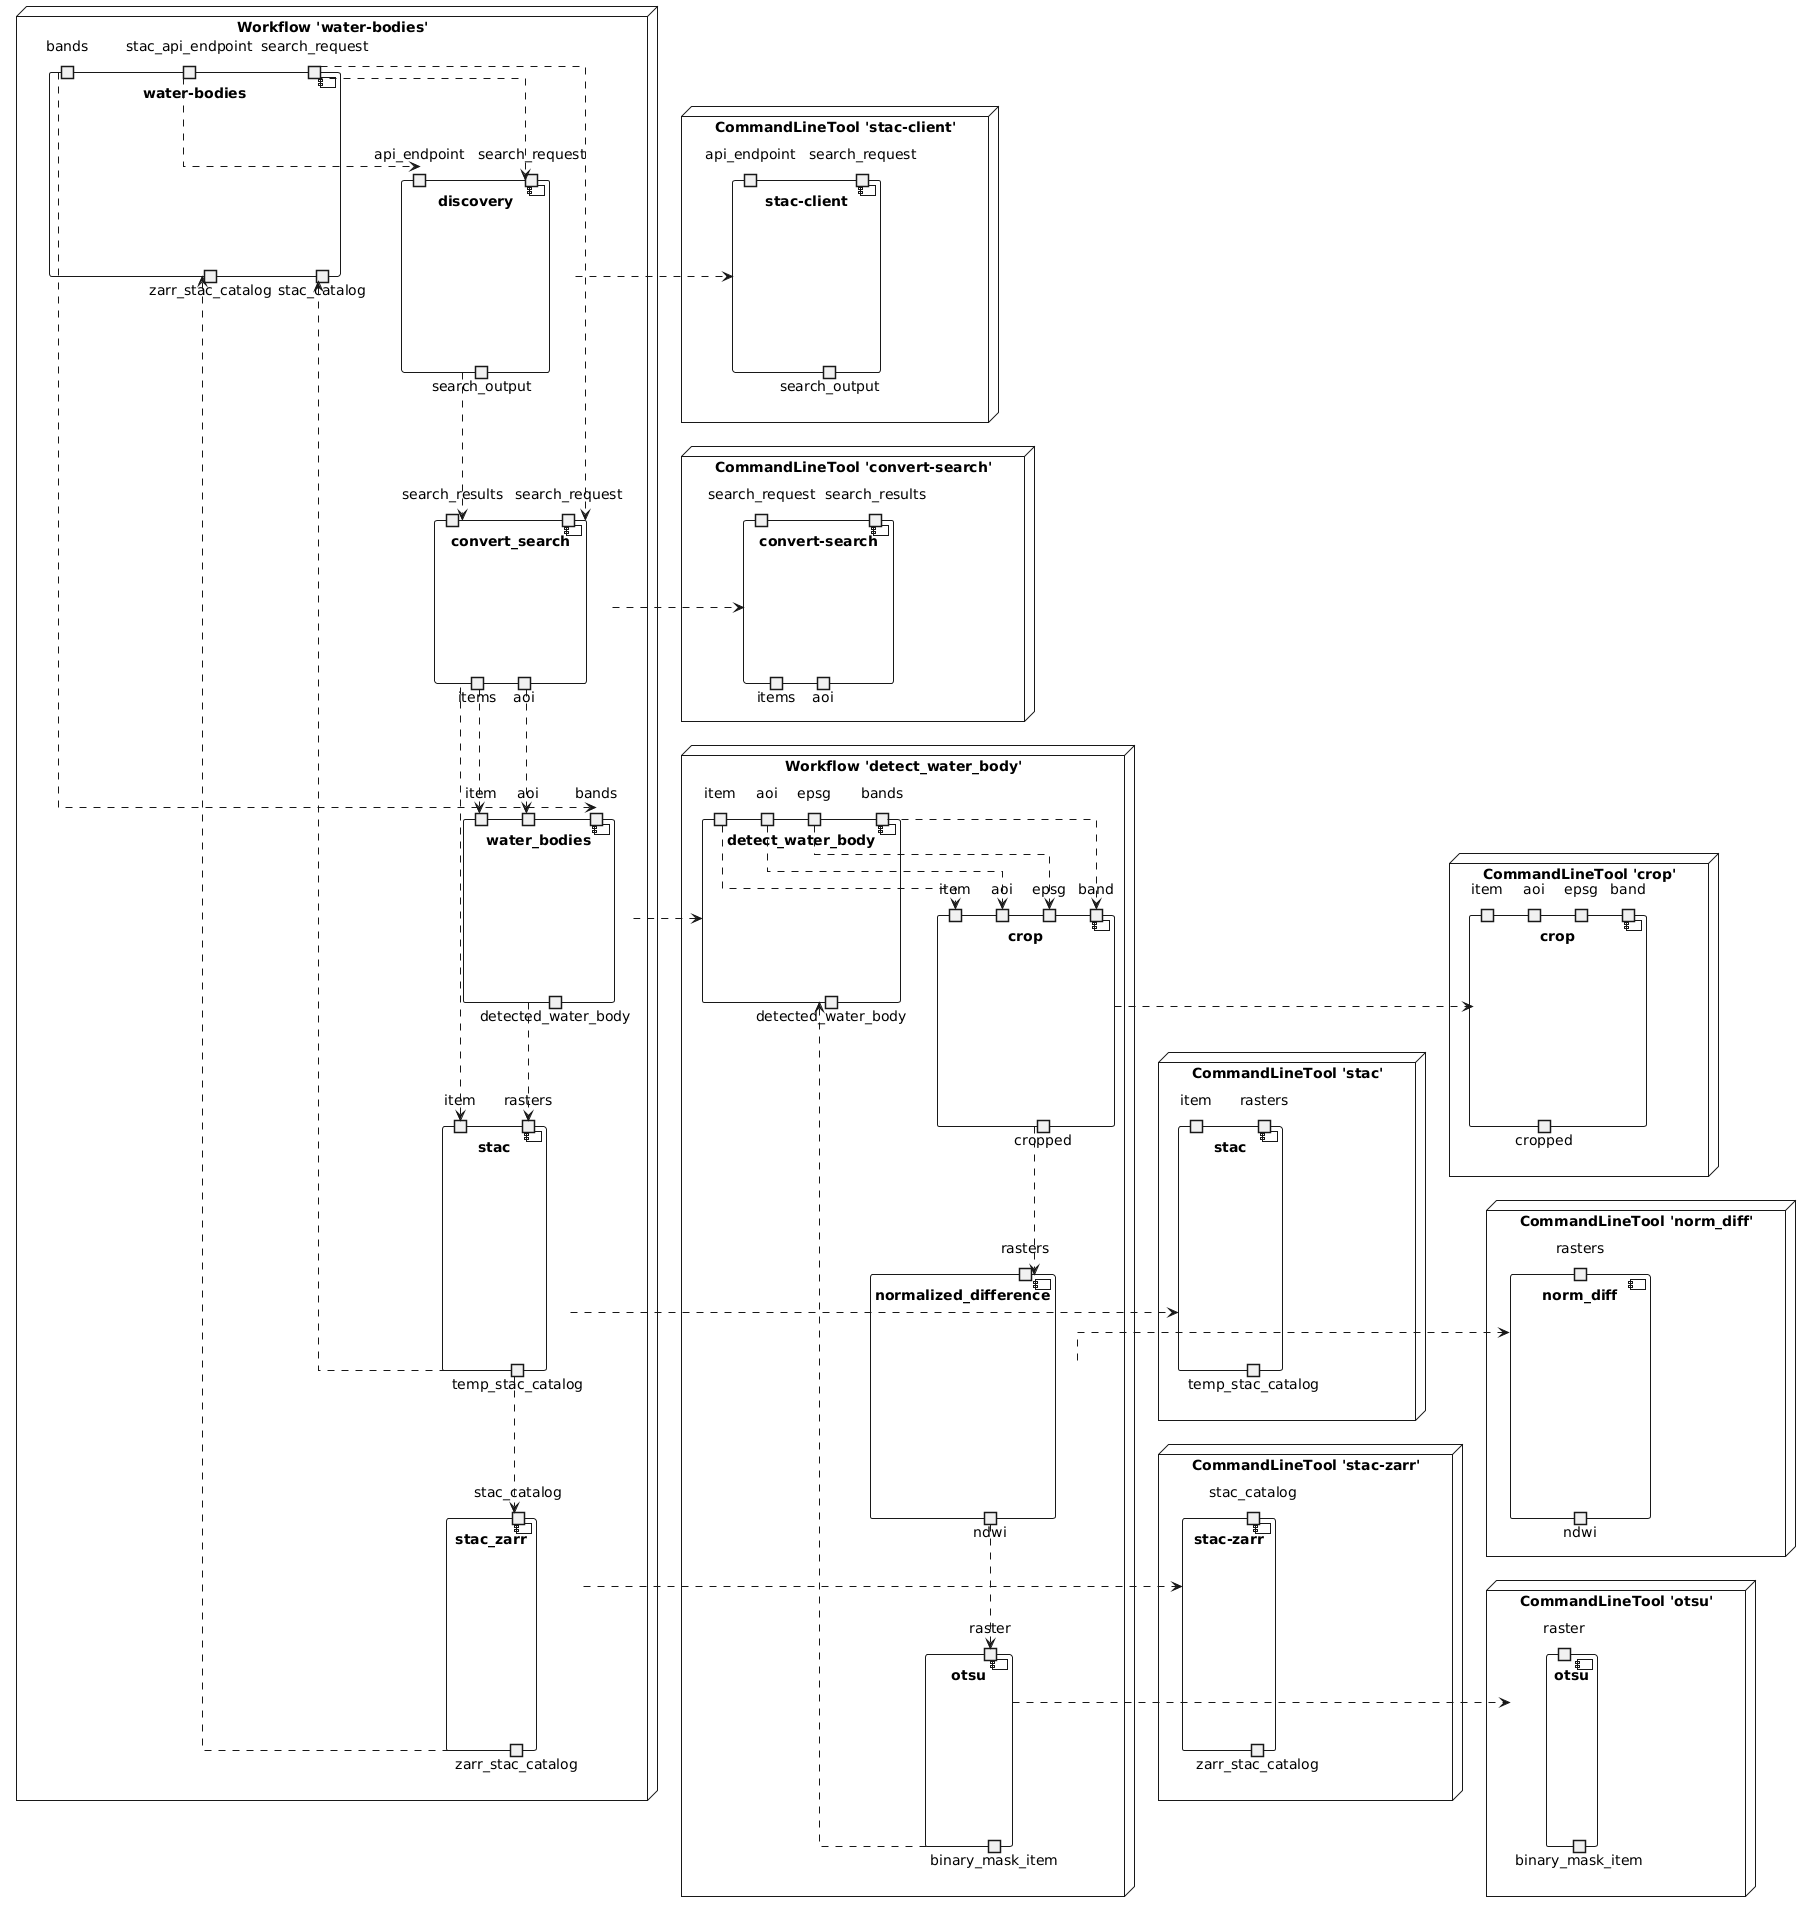

## 2.2 PlantUML `class` diagram

@startuml


class "otsu" as otsu extends CommandLineTool {
    __ Inputs __
    
    + raster: File
    

    __ Outputs __
    
    + binary_mask_item: File
    

    
}

    
    package "Requirements" {
    
        
otsu --> InlineJavascriptRequirement
        
    
        
otsu --> EnvVarRequirement
        
    
        
otsu --> ResourceRequirement
        
    
    }
    

    
    package "Hints" {
    
        
otsu --> DockerRequirement
        
    
    }
    

class "water-bodies" as water_bodies extends Workflow {
    __ Inputs __
    
    + stac_api_endpoint: https://raw.githubusercontent.com/eoap/schemas/main/experimental/api-endpoint.yaml#APIEndpoint
    
    + search_request: https://raw.githubusercontent.com/eoap/schemas/main/experimental/discovery.yaml#STACSearchSettings
    
    + bands: string[] = ['green', 'nir']
    

    __ Outputs __
    
    + zarr_stac_catalog: Directory
    
    + stac_catalog: Directory
    

    
    __ Steps __
        
    - discovery:

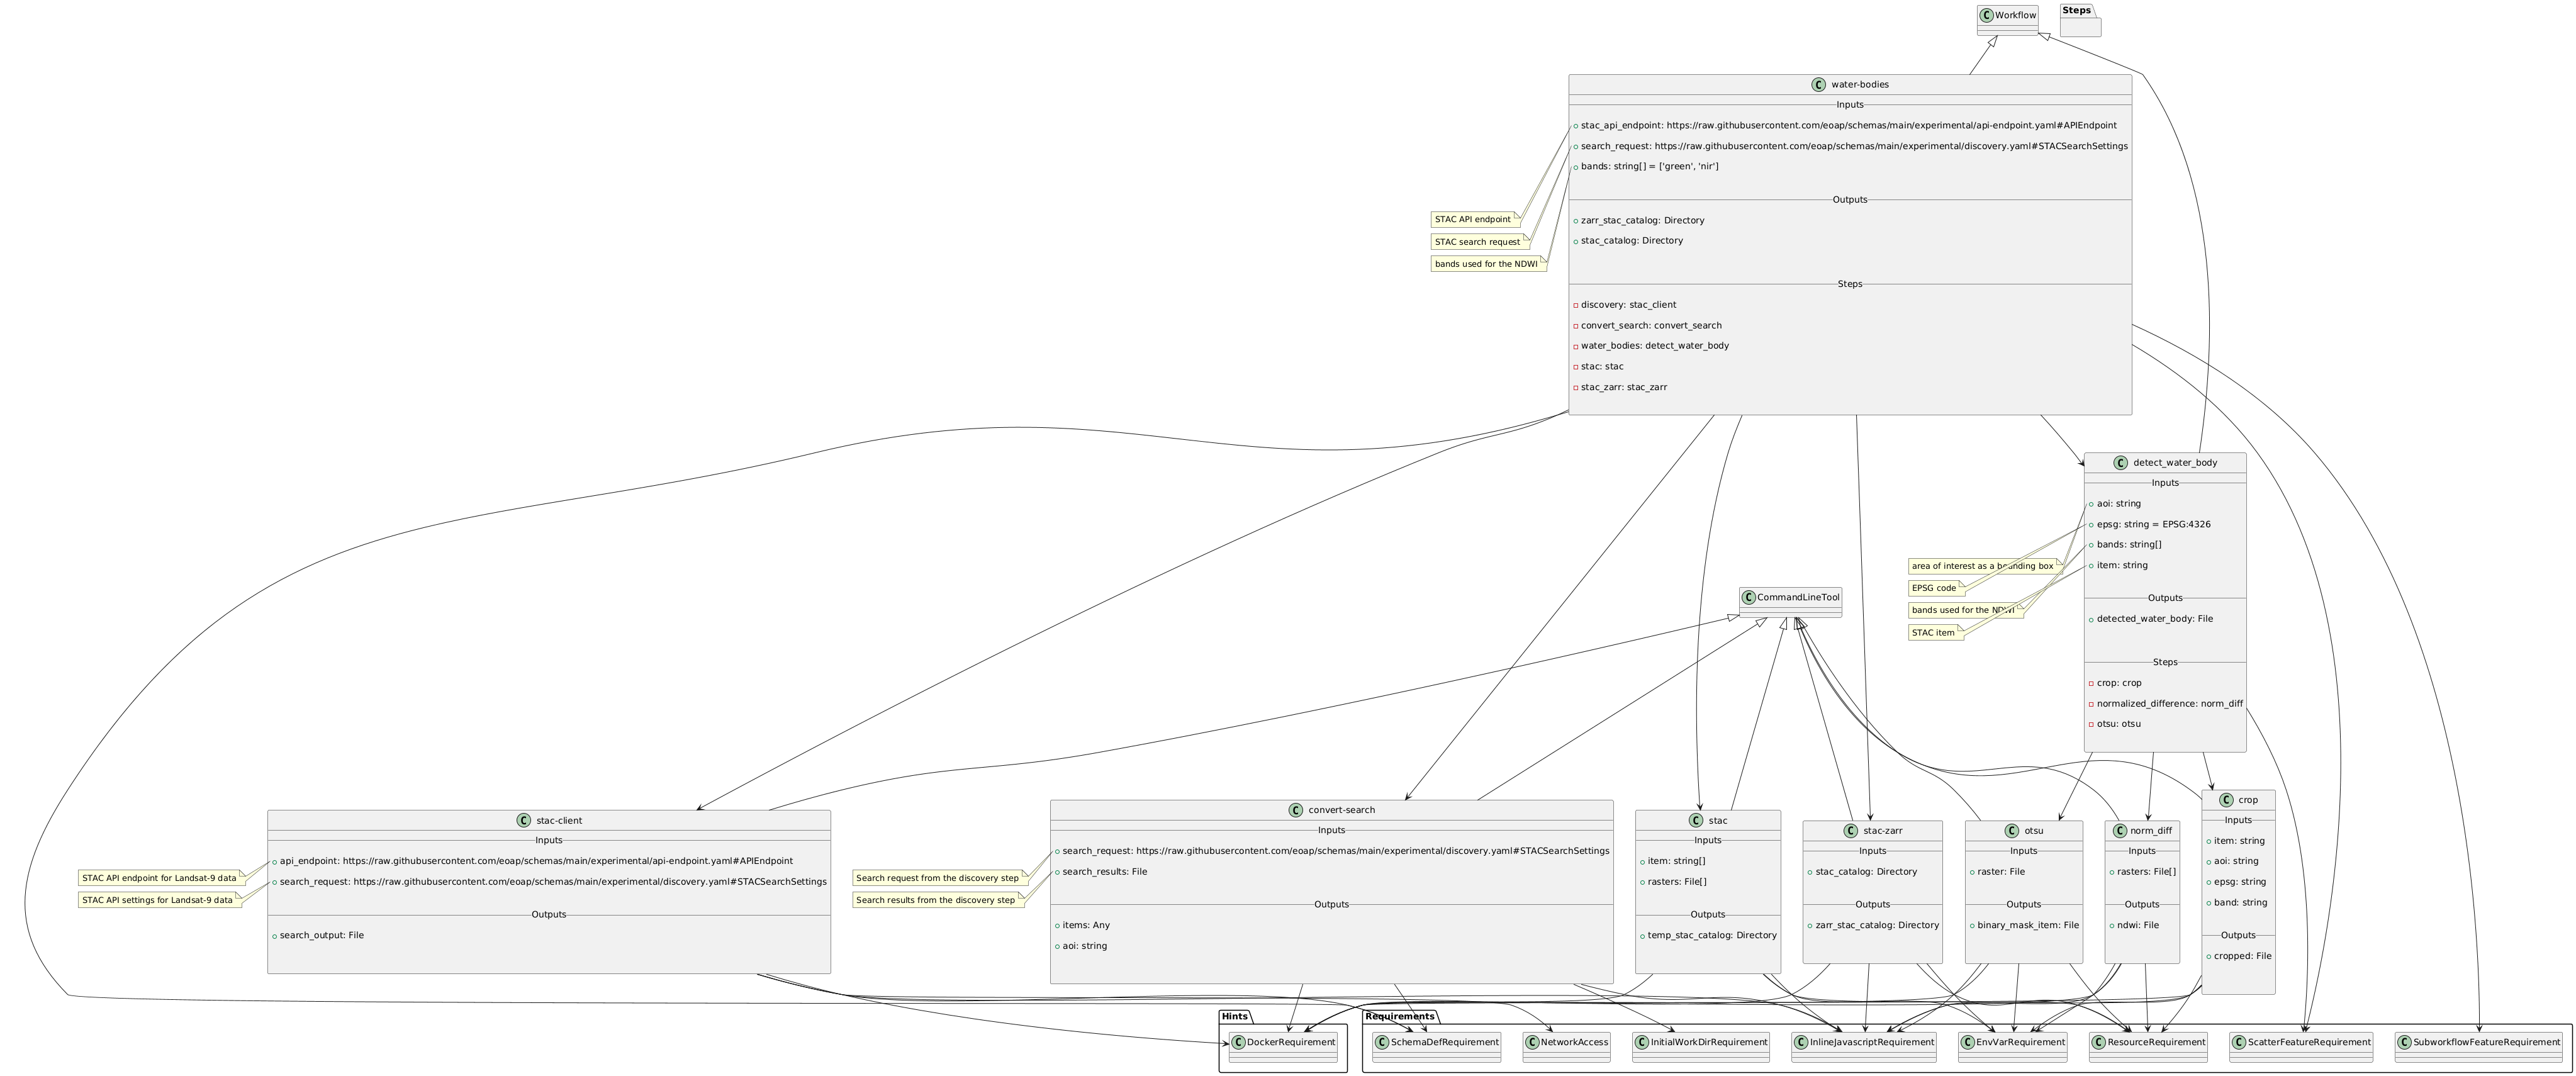

## 2.3 PlantUML `sequence` diagram

@startuml
autonumber "<b>[000]"





entity "Workflow runner" as wfrunner
activate wfrunner


    

    
== Water bodies detection based on NDWI and otsu threshold applied to Sentinel-2 COG STAC items ==
control "water-bodies" as water_bodies_or
activate water_bodies_or

        
wfrunner -> water_bodies_or : ""stac_api_endpoint""
        
wfrunner -> water_bodies_or : ""search_request""
        
wfrunner -> water_bodies_or : ""bands""
        


    

    
        
    
        
    
        
    
        
    
        
    
        
    
        
    
        
    
        
    
            
    
participant discovery
activate discovery

        
water_bodies_or -> discovery : ""api_endpoint"" (from ""stac_api_endpoint"")
        
water_bodies_or -> discovery : ""search_request"" (from ""search_request"")
        

        
water_bodies_or <-- discovery : ""search_output""
        
deactivate discovery
    

    

    
        
    
        
    
        
    
        
    
        


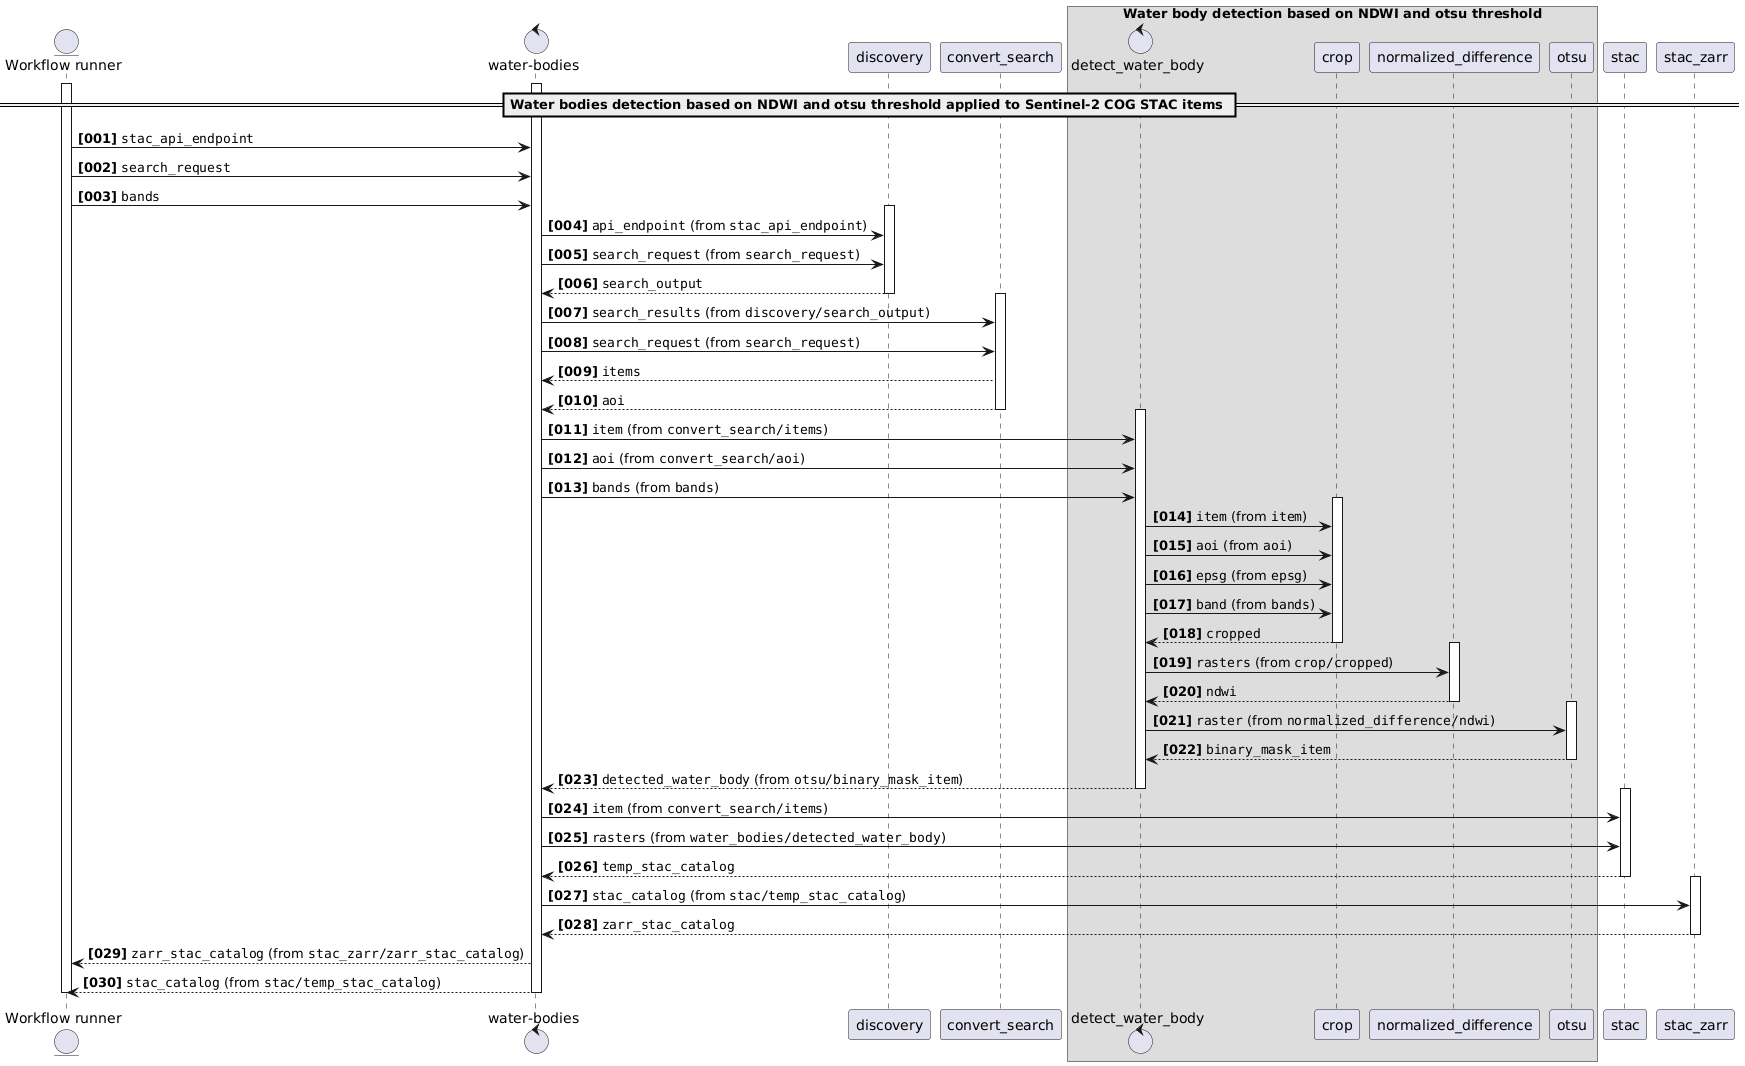

In [52]:
from cwl2puml import (
    to_puml,
    DiagramType
)
from io import (
    StringIO,
    BytesIO
)
from IPython.display import (
    display,
    Markdown,
    display_png
)
from plantuml import deflate_and_encode
from PIL import Image
from urllib.request import urlopen

for i, diagram_type in enumerate(DiagramType):
#for i, diagram_type in enumerate([DiagramType.SEQUENCE]):
    index = i + 1
    display(Markdown(f"## 2.{index} PlantUML `{diagram_type.name.lower()}` diagram"))

    out = StringIO()
    to_puml(
        cwl_document=cwl_document,
        diagram_type=diagram_type,
        output_stream=out
    )

    clear_output = out.getvalue()

    print(clear_output)

    encoded = deflate_and_encode(clear_output)
    diagram_url = f"https://www.plantuml.com/plantuml/png/{encoded}"

    with urlopen(diagram_url) as url:
        img = Image.open(BytesIO(url.read()))
    display_png(img)